# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

/var/folders/0c/r0htcd1j05v_lb53s4xtzbn80000gn/T/ipykernel_17930/3018219347.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("../data/train.csv")


# 1️⃣ Datenbereinigung - train

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Identifikatoren - ID, Customer_ID, Name, SSN
- Entfernt überflüssige Leerzeichen in den ID-Spalten
- Vereinheitlicht Namen und setzt fehlende Werte auf Unknown
- Maskiert ungültige SSN-Einträge

In [5]:
train_df['ID'] = train_df['ID'].astype(str).str.strip()
train_df['Customer_ID'] = train_df['Customer_ID'].astype(str).str.strip()

In [6]:
train_df['Name'] = (
    train_df['Name']
    .fillna('Unknown')
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

In [7]:
pattern = re.compile(r'^\d{3}-\d{2}-\d{4}$')

train_df['SSN'] = (
    train_df['SSN']
    .astype(str)
    .str.strip()
    .where(lambda s: s.apply(lambda x: bool(pattern.match(x)) if isinstance(x, str) else False), other=pd.NA)
)

In [8]:
train_df[['ID', 'Customer_ID', 'Name', 'SSN']].head()

,ID,Customer_ID,Name,SSN
0,0x1602,CUS_0xd40,Aaron Maashoh,821-00-0265
1,0x1603,CUS_0xd40,Aaron Maashoh,821-00-0265
2,0x1604,CUS_0xd40,Aaron Maashoh,821-00-0265
3,0x1605,CUS_0xd40,Aaron Maashoh,821-00-0265
4,0x1606,CUS_0xd40,Aaron Maashoh,821-00-0265


## Month - Represents the month of the year

- Zu welchen Monat die Daten zu der ID gehören
- Eine ID (Kunde) enthählt 3 Einträge zu seinem Konto und hat somit 3 Monate (Bsp. Mai bis Juli)

In [9]:
train_df["Month"].isna().sum()

0

In [10]:
train_df['Month'] = (
    train_df['Month']
    .astype(str)
    .str.strip()
    .str.title()
)

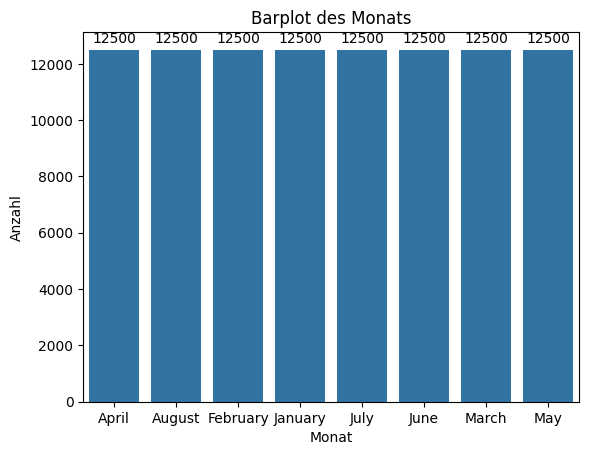

In [11]:
ax = sns.barplot(
    x=train_df['Month'].value_counts().sort_index().index.astype(str),
    y=train_df['Month'].value_counts().sort_index().values
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Barplot des Monats')
plt.xlabel('Monat')
plt.ylabel('Anzahl')
plt.show()


- man hat nur Daten von Januar bis August
- was ist mit Septemeber bis Dezember?

## Age - Represents the age of the person

- "_" wird entfernt
- wird als Dtype numeric und aufgerundet
- durch Aufrundung entsehen 3- und 4-stellige Zahlen; dabei werden erst die letzten Ziffen entfernt --> dadruch wird 2 stellig
- unter 16 wird auf 16 gesetzt, da es um ein Kredit geht (Arbeitsfähigkeit)
- fehlende Werte werden mit dem Median ersetzt

In [12]:
train_df["Age"].isna().sum()

0

In [13]:
train_df['Age'] = (
    train_df['Age']
    .astype(str)
    .str.replace('_', '', regex=False)
)

In [14]:
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce').abs()

In [15]:
mask = train_df['Age'] >= 100
train_df.loc[mask, 'Age'] = (
    train_df.loc[mask, 'Age'].astype(str).str[:1].astype(float)
)

mask = train_df['Age'] >= 100
train_df.loc[mask, 'Age'] = (
    train_df.loc[mask, 'Age'].astype(str).str[:1].astype(float)
)

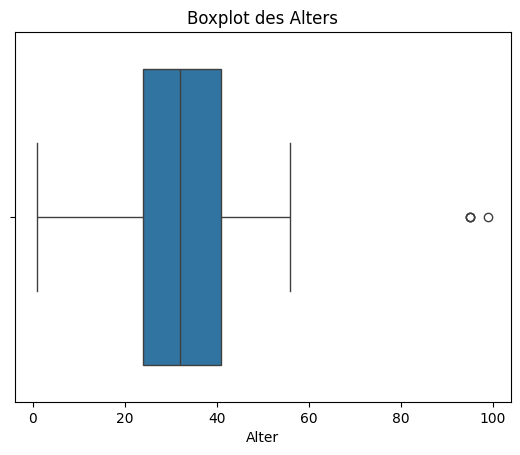

In [16]:
sns.boxplot(data=train_df, x="Age")
plt.title("Boxplot des Alters")
plt.xlabel("Alter")
plt.show()

In [17]:
train_df['Age'] = (
    train_df['Age']
    .clip(lower=16)
    .fillna(train_df['Age'].median())
    .round()
    .astype('Int64')
)

In [18]:
train_df['Age'].describe()

count     100000.0
mean      32.88078
std      10.937585
min           16.0
25%           24.0
50%           32.0
75%           41.0
max           99.0
Name: Age, dtype: Float64

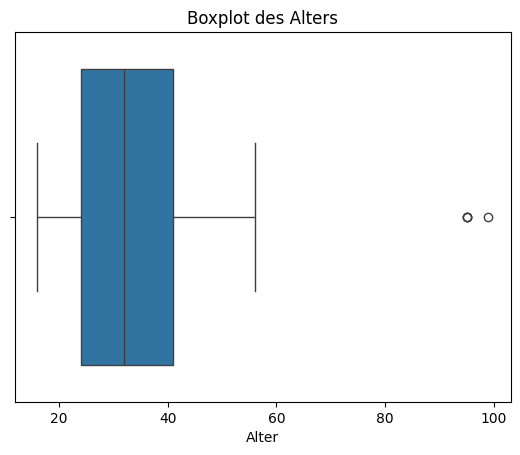

In [19]:
sns.boxplot(data=train_df, x="Age")
plt.title("Boxplot des Alters")
plt.xlabel("Alter")
plt.show()

## Occupation - Represents the Occupation of the person (Beruf)

- Unbekannte Berufe werden mit "Unknown" gekennzeichnet
- Texte werden bereinigt

In [20]:
train_df["Occupation"].isna().sum()

0

In [21]:
train_df['Occupation'] = (
    train_df['Occupation']
    .astype(str)
    .replace('_______', 'Unknown')
    .str.replace('_', ' ', regex=False)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .str.title()
)

In [22]:
train_df['Occupation'].value_counts().head(10)

Occupation
Unknown          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media Manager    6232
Teacher          6215
Name: count, dtype: int64

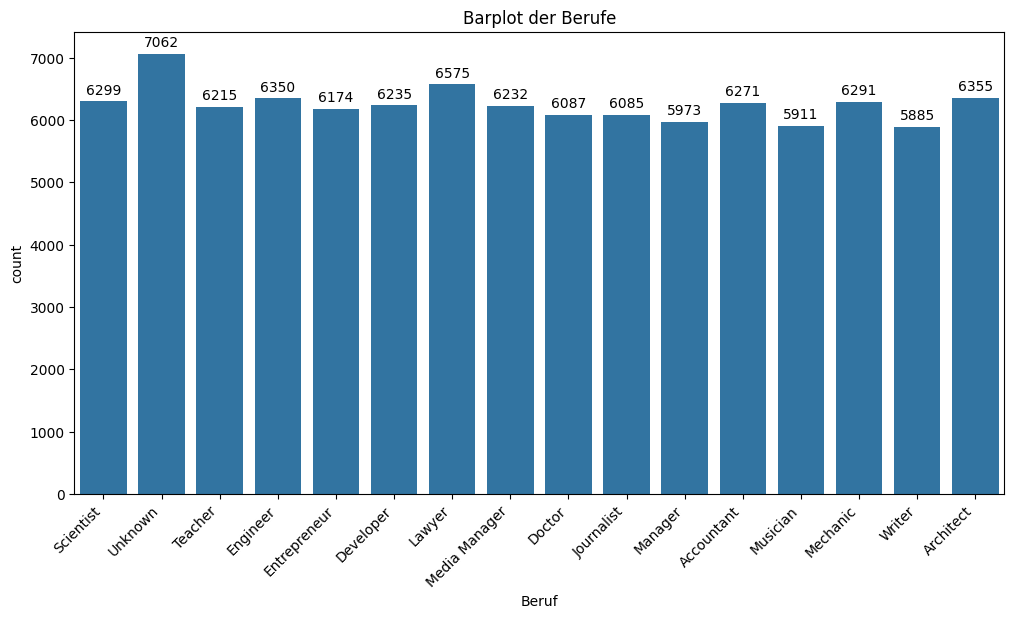

In [23]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(train_df, x="Occupation")

for container in ax.containers:
    ax.bar_label(container, fmt='%d',
                label_type='edge',
                padding=3)

plt.xticks(rotation=45, ha="right")
plt.title("Barplot der Berufe")
plt.xlabel("Beruf")
plt.show()

## Annual_Income - Represents the annual income of the person

- zu numeric umgewandelt
- nicht Zahlenartige zeichen entfernt
- NaN hinzugefügt für nicht Zahlenwerte
- alles unter 0 in positive Werte ungewandelt
- NaN mit Median ersetzt

In [24]:
train_df["Annual_Income"].isna().sum()

0

In [25]:
train_df['Annual_Income'] = (
    pd.to_numeric(
        train_df['Annual_Income']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan}),
        errors='coerce'
    )
    .abs()
    .fillna(lambda s: s.median())
)

In [26]:
train_df['Annual_Income'].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

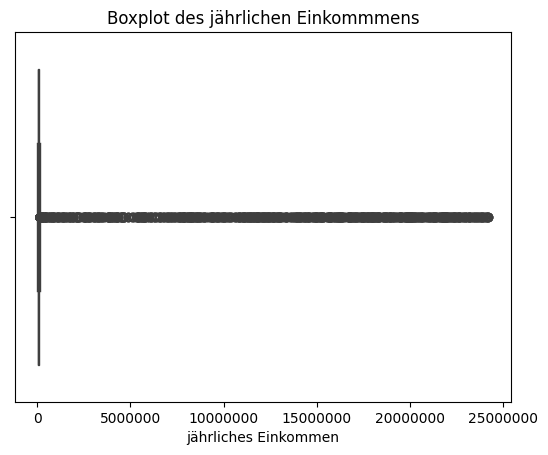

In [27]:
sns.boxplot(data=train_df, x="Annual_Income")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot des jährlichen Einkommmens")
plt.xlabel("jährliches Einkommen")
plt.show()

- Sehr starke und viele Ausreißer, diese ggf. entfernen

## Monthly_Inhand_Salary - Represents the monthly base salary of a person

- leere Werte mit dem Jährlichen Gehalte durch 12 berechnet (vorausgesetzt man erhählt nur 12 Gehälter)

In [28]:
train_df['Monthly_Inhand_Salary'].isna().sum()

15002

In [29]:
train_df['Monthly_Inhand_Salary'] = train_df['Monthly_Inhand_Salary'].fillna(train_df['Annual_Income'] / 12)

In [30]:
train_df['Monthly_Inhand_Salary'].describe()

count    1.000000e+05
mean     5.743259e+03
std      4.581469e+04
min      3.036454e+02
25%      1.625793e+03
50%      3.101372e+03
75%      5.971780e+03
max      1.990380e+06
Name: Monthly_Inhand_Salary, dtype: float64

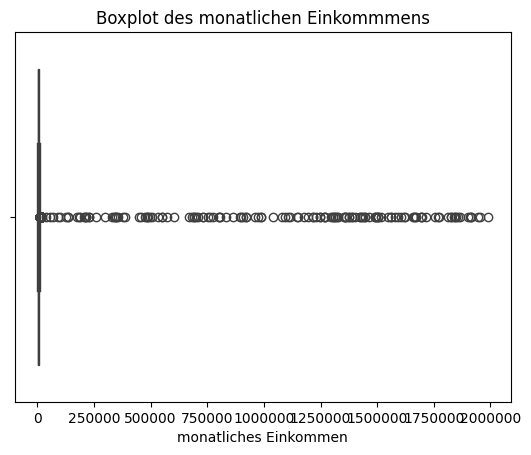

In [31]:
sns.boxplot(data=train_df, x="Monthly_Inhand_Salary")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot des monatlichen Einkommmens")
plt.xlabel("monatliches Einkommen")
plt.show()

- Sehr starke und viele Ausreißer, diese ggf. entfernen

## Num_Bank_Accounts - Represents the number of bank accounts a person holds

- alle nicht Zahlenartige Werte werden entfernt
- Komma wird mit Punkt ersetzt 
- wird zu Zahl umgewandelt
- negative Werte werden positiv
- alle 3 und 4 stellige Zahlen werden auf 2 stellig umgewandelt

In [32]:
train_df["Num_Bank_Accounts"].isna().sum()

0

In [33]:
train_df['Num_Bank_Accounts'] = (
    train_df['Num_Bank_Accounts']
      .astype(str)
      .str.replace(r'[^0-9\-\.,]', '', regex=True)
      .str.replace(',', '.', regex=False)
      .pipe(pd.to_numeric, errors='coerce')
      .abs()
      .round()
).astype('Int64')

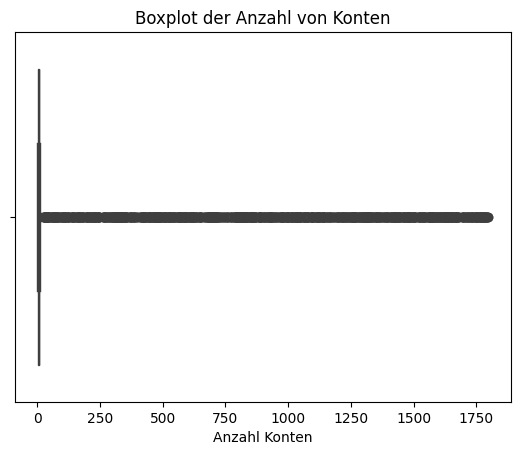

In [34]:
sns.boxplot(data=train_df, x="Num_Bank_Accounts")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Anzahl von Konten")
plt.xlabel("Anzahl Konten")
plt.show()

In [35]:
mask = train_df['Num_Bank_Accounts'] >= 100
train_df.loc[mask, 'Num_Bank_Accounts'] = (
    train_df.loc[mask, 'Num_Bank_Accounts'].astype(str).str[:1].astype(float)
)

mask = train_df['Num_Bank_Accounts'] >= 100
train_df.loc[mask, 'Num_Bank_Accounts'] = (
    train_df.loc[mask, 'Num_Bank_Accounts'].astype(str).str[:1].astype(float)
)

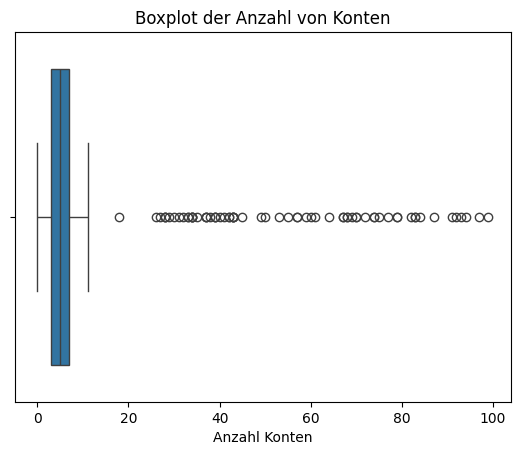

In [36]:
sns.boxplot(data=train_df, x="Num_Bank_Accounts")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Anzahl von Konten")
plt.xlabel("Anzahl Konten")
plt.show()

In [37]:
train_df['Num_Bank_Accounts'].describe()

count    100000.0
mean      5.37433
std      2.961131
min           0.0
25%           3.0
50%           5.0
75%           7.0
max          99.0
Name: Num_Bank_Accounts, dtype: Float64

## Num_Credit_Card - Represents the number of other credit cards held by a person

- Werte werden zu Zahlen umgewandelt
- nicht zahlenartige Werte werden entfernt
- Leere Werte werden mit NaN ersetzt
- alle negative Werte werden positiv
- alles 3 und 4 stellige Zahlen werden 2 stellig
- Fehlende Werte werden mit dem Median ersetzt

In [38]:
train_df["Num_Credit_Card"].isna().sum()

0

In [39]:
train_df['Num_Credit_Card'] = (
    pd.to_numeric(
        train_df['Num_Credit_Card']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan}),
        errors='coerce'
    )
    .abs()
    .round()
    .astype('Int64')
    .fillna(lambda s: s.median())
)

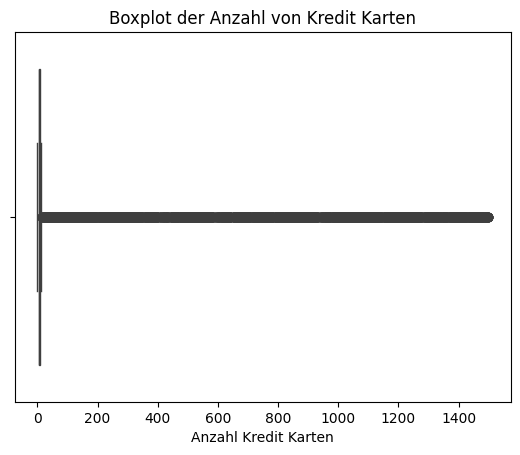

In [40]:
sns.boxplot(data=train_df, x="Num_Credit_Card")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Anzahl von Kredit Karten")
plt.xlabel("Anzahl Kredit Karten")
plt.show()

In [41]:
mask = train_df['Num_Credit_Card'] >= 100
train_df.loc[mask, 'Num_Credit_Card'] = (
    train_df.loc[mask, 'Num_Credit_Card'].astype(str).str[:1].astype(float)
)

mask = train_df['Num_Credit_Card'] >= 100
train_df.loc[mask, 'Num_Credit_Card'] = (
    train_df.loc[mask, 'Num_Credit_Card'].astype(str).str[:1].astype(float)
)

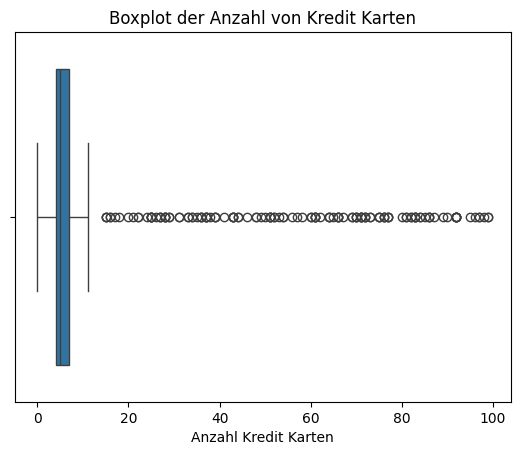

In [42]:
sns.boxplot(data=train_df, x="Num_Credit_Card")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Anzahl von Kredit Karten")
plt.xlabel("Anzahl Kredit Karten")
plt.show()

In [43]:
train_df['Num_Credit_Card'].describe()

count    100000.0
mean      5.56058
std      2.981563
min           0.0
25%           4.0
50%           5.0
75%           7.0
max          99.0
Name: Num_Credit_Card, dtype: Float64

## Interest_Rate - Represents the interest rate on credit card

- Wert wird numerisch
- alle nicht zahlenartige Zahlen werden entfernt
- leere Werte etc. werden mit NaN ersetzt
- negative Werte werden positiv
- 3 und 4 stellige Zahlen werden 2 stellig

In [44]:
train_df["Interest_Rate"].isna().sum()

0

In [45]:
train_df['Interest_Rate'] = (
    pd.to_numeric(
        train_df['Interest_Rate']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan}),
        errors='coerce'
    )
    .abs()
    .round()
    .astype('Int64')
    .fillna(lambda s: s.median())
)

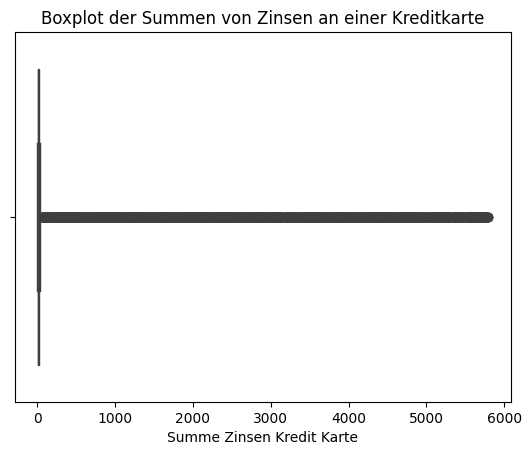

In [46]:
sns.boxplot(data=train_df, x="Interest_Rate")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Summen von Zinsen an einer Kreditkarte")
plt.xlabel("Summe Zinsen Kredit Karte")
plt.show()

In [47]:
mask = train_df['Interest_Rate'] >= 100
train_df.loc[mask, 'Interest_Rate'] = (
    train_df.loc[mask, 'Interest_Rate'].astype(str).str[:1].astype(float)
)

mask = train_df['Interest_Rate'] >= 100
train_df.loc[mask, 'Interest_Rate'] = (
    train_df.loc[mask, 'Interest_Rate'].astype(str).str[:1].astype(float)
)

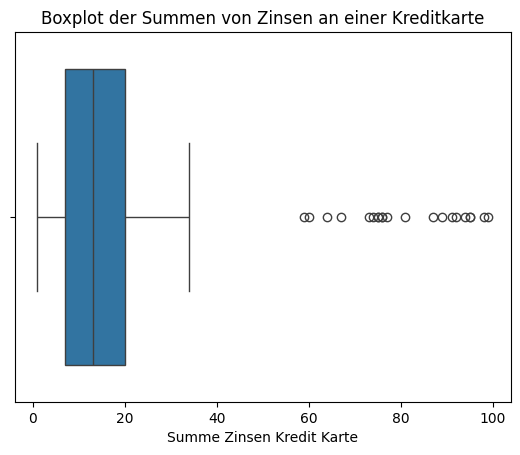

In [48]:
sns.boxplot(data=train_df, x="Interest_Rate")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Summen von Zinsen an einer Kreditkarte")
plt.xlabel("Summe Zinsen Kredit Karte")
plt.show()

In [49]:
train_df['Interest_Rate'].describe()

count    100000.0
mean     14.31833
std      8.852722
min           1.0
25%           7.0
50%          13.0
75%          20.0
max          99.0
Name: Interest_Rate, dtype: Float64

## Num_of_Loan - Represents the number of loans taken from the bank

- Wert wird numerisch
- nicht Zahlenartige Werte werden entfernt
- Leere Werte etc. werden mit NaN ersetzt
- negative Werte werden positiv
- 3 und 4 stellige Zahlen werden 2 stellig

In [50]:
train_df["Num_of_Loan"].isna().sum()

0

In [51]:
train_df['Num_of_Loan'] = (
    pd.to_numeric(
        train_df['Num_of_Loan']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan}),
        errors='coerce'
    )
    .abs()
    .round()
    .astype('Int64')
    .fillna(lambda s: s.median())
)

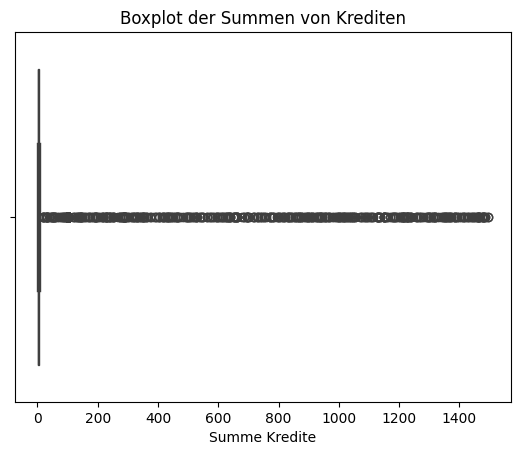

In [52]:
sns.boxplot(data=train_df, x="Num_of_Loan")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Summen von Krediten")
plt.xlabel("Summe Kredite")
plt.show()

In [53]:
mask = train_df['Num_of_Loan'] >= 100
train_df.loc[mask, 'Num_of_Loan'] = (
    train_df.loc[mask, 'Num_of_Loan'].astype(str).str[:1].astype(float)
)

mask = train_df['Num_of_Loan'] >= 100
train_df.loc[mask, 'Num_of_Loan'] = (
    train_df.loc[mask, 'Num_of_Loan'].astype(str).str[:1].astype(float)
)

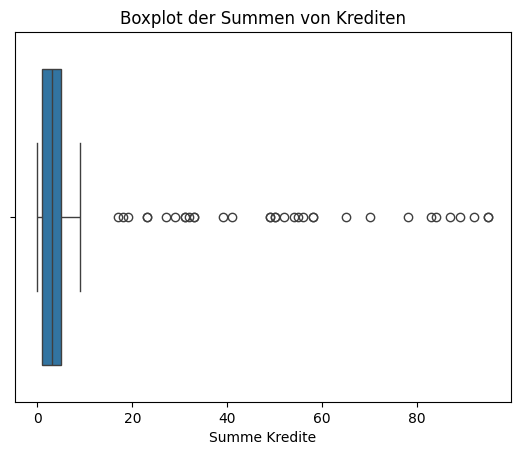

In [54]:
sns.boxplot(data=train_df, x="Num_of_Loan")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Summen von Krediten")
plt.xlabel("Summe Kredite")
plt.show()

In [55]:
train_df['Num_of_Loan'].describe()

count    100000.0
mean      3.45168
std      2.645577
min           0.0
25%           1.0
50%           3.0
75%           5.0
max          95.0
Name: Num_of_Loan, dtype: Float64

## Type_of_Loan - Represents the types of loan taken by a person

- keine Bereinigung, da individuelle Text vorhanden sind

In [56]:
train_df["Type_of_Loan"].head(10)

0    Auto Loan, Credit-Builder Loan, Personal Loan,...
1    Auto Loan, Credit-Builder Loan, Personal Loan,...
2    Auto Loan, Credit-Builder Loan, Personal Loan,...
3    Auto Loan, Credit-Builder Loan, Personal Loan,...
4    Auto Loan, Credit-Builder Loan, Personal Loan,...
5    Auto Loan, Credit-Builder Loan, Personal Loan,...
6    Auto Loan, Credit-Builder Loan, Personal Loan,...
7    Auto Loan, Credit-Builder Loan, Personal Loan,...
8                                  Credit-Builder Loan
9                                  Credit-Builder Loan
Name: Type_of_Loan, dtype: object

In [57]:
train_df["Type_of_Loan"].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

## Delay_from_due_date - Represents the average number of days delayed from the payment date

- Wert wird numerisch
- fehlende Werte mit dem Median ersetzt
- negative Werte werden postitiv

In [58]:
train_df["Delay_from_due_date"].isna().sum()

0

In [59]:
train_df['Delay_from_due_date'] = (
    pd.to_numeric(train_df['Delay_from_due_date'], errors='coerce')
    .fillna(lambda s: s.median())
    .abs()
    .astype('Int64')
)

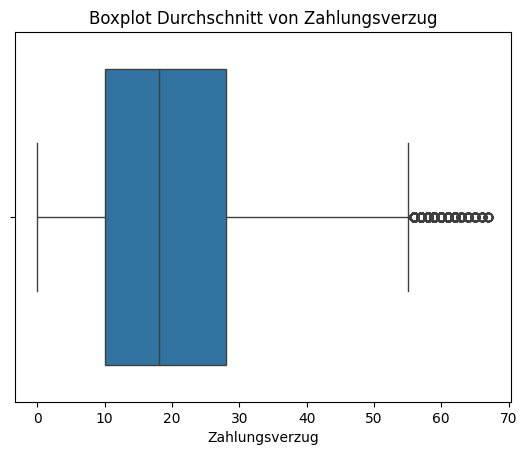

In [60]:
sns.boxplot(data=train_df, x="Delay_from_due_date")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot Durchschnitt von Zahlungsverzug")
plt.xlabel("Zahlungsverzug")
plt.show()

In [61]:
train_df['Delay_from_due_date'].describe()

count     100000.0
mean      21.09504
std      14.822802
min            0.0
25%           10.0
50%           18.0
75%           28.0
max           67.0
Name: Delay_from_due_date, dtype: Float64

## Num_of_Delayed_Payment - Represents the average number of payments delayed by a person

- nicht zahlenartige Werte werden entfernt
- leere Werte etc. werden mit NaN ersetzt
- Werte werden numerisch
- fehlende Werte werden mit dem Median ersetzt
- negative Werte werden positiv
- 3 und 4 stellige Werte werden 2 stellig

In [62]:
train_df["Num_of_Delayed_Payment"].isna().sum()

7002

In [63]:
train_df['Num_of_Delayed_Payment'] = (
    train_df['Num_of_Delayed_Payment']
    .astype(str)
    .str.replace(r'[^0-9\-\.]', '', regex=True)
    .replace({'': np.nan, '-': np.nan, '.': np.nan})
    .pipe(pd.to_numeric, errors='coerce')
    .pipe(lambda s: s.fillna(s.median()))
    .abs()
    .astype('Int64')
)

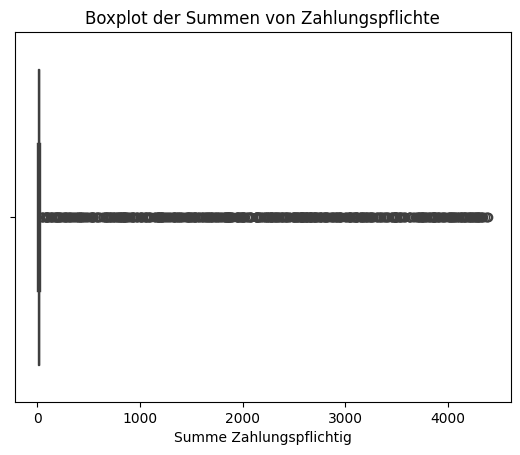

In [64]:
sns.boxplot(data=train_df, x="Num_of_Delayed_Payment")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Summen von Zahlungspflichte")
plt.xlabel("Summe Zahlungspflichtig")
plt.show()

In [65]:
mask = train_df['Num_of_Delayed_Payment'] >= 100
train_df.loc[mask, 'Num_of_Delayed_Payment'] = (
    train_df.loc[mask, 'Num_of_Delayed_Payment'].astype(str).str[:1].astype(float)
)

mask = train_df['Num_of_Delayed_Payment'] >= 100
train_df.loc[mask, 'Num_of_Delayed_Payment'] = (
    train_df.loc[mask, 'Num_of_Delayed_Payment'].astype(str).str[:1].astype(float)
)

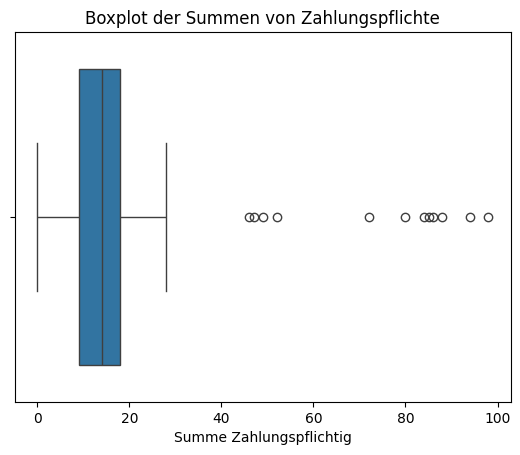

In [66]:
sns.boxplot(data=train_df, x="Num_of_Delayed_Payment")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot der Summen von Zahlungspflichte")
plt.xlabel("Summe Zahlungspflichtig")
plt.show()

In [67]:
train_df['Num_of_Delayed_Payment'].describe()

count    100000.0
mean     13.31473
std      6.125856
min           0.0
25%           9.0
50%          14.0
75%          18.0
max          98.0
Name: Num_of_Delayed_Payment, dtype: Float64

## Changed_Credit_Limit - Represents the percentage change in credit card limit

- nicht zahlenartige Werte werden entfernt
- Leere Werte etc. werden mit NaN ersetzt
- Wert wird numerisch
- NaN werden mit 0 ersetzt

In [68]:
train_df["Changed_Credit_Limit"].head(10)

0    11.27
1    11.27
2        _
3     6.27
4    11.27
5     9.27
6    11.27
7    11.27
8     5.42
9     7.42
Name: Changed_Credit_Limit, dtype: object

In [69]:
train_df["Changed_Credit_Limit"].isna().sum()

0

In [70]:
train_df['Changed_Credit_Limit'] = (
    train_df['Changed_Credit_Limit']
    .astype(str)
    .str.replace(r'[^0-9\-\.]', '', regex=True)
    .replace({'': np.nan, '-': np.nan, '.': np.nan})
    .pipe(pd.to_numeric, errors='coerce')
    .fillna(0)
)

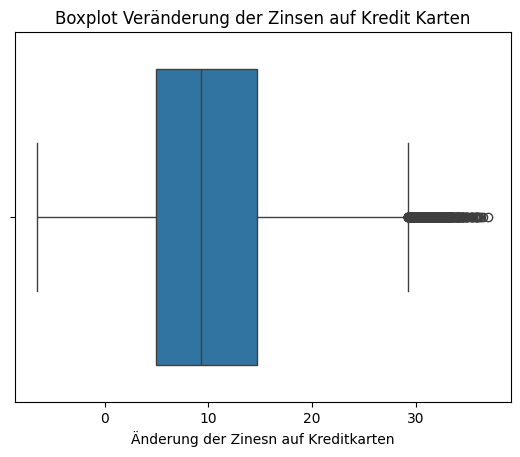

In [71]:
sns.boxplot(data=train_df, x="Changed_Credit_Limit")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot Veränderung der Zinsen auf Kredit Karten")
plt.xlabel("Änderung der Zinesn auf Kreditkarten")
plt.show()

In [72]:
train_df['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.171791
std           6.880628
min          -6.490000
25%           4.970000
50%           9.250000
75%          14.660000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

## Num_Credit_Inquiries - Represents the number of credit card inquiries

- nicht zahlenartige Wertw werden entfernt
- leere Werte etc. werden mit NaN ersetzt
- Werte werden numerisch
- fehlende Werte mit dem Median ersetzen
- Negative Werte werden positiv
- 3 und 4 stellige Zahlen werden 2 stellig

In [73]:
train_df["Num_Credit_Inquiries"].isna().sum()

1965

In [74]:
train_df['Num_Credit_Inquiries'] = (
    train_df['Num_Credit_Inquiries']
    .astype(str)
    .str.replace(r'[^0-9\-\.]', '', regex=True)
    .replace({'': np.nan, '-': np.nan, '.': np.nan})
    .pipe(pd.to_numeric, errors='coerce')
    .pipe(lambda s: s.fillna(s.median()))
    .abs()
    .round()
    .astype('Int64')
)

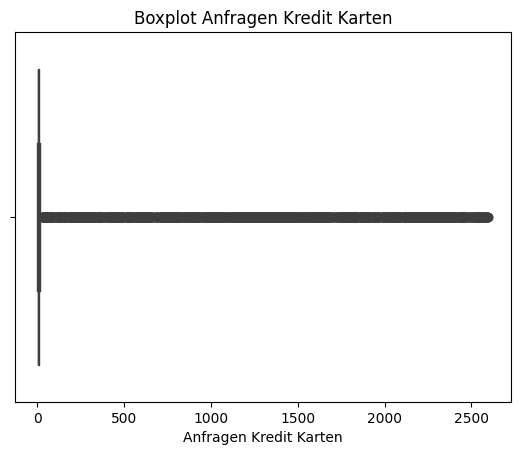

In [75]:
sns.boxplot(data=train_df, x="Num_Credit_Inquiries")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot Anfragen Kredit Karten")
plt.xlabel("Anfragen Kredit Karten")
plt.show()

In [76]:
mask = train_df['Num_Credit_Inquiries'] >= 100
train_df.loc[mask, 'Num_Credit_Inquiries'] = (
    train_df.loc[mask, 'Num_Credit_Inquiries'].astype(str).str[:1].astype(float)
)

mask = train_df['Num_Credit_Inquiries'] >= 100
train_df.loc[mask, 'Num_Credit_Inquiries'] = (
    train_df.loc[mask, 'Num_Credit_Inquiries'].astype(str).str[:1].astype(float)
)

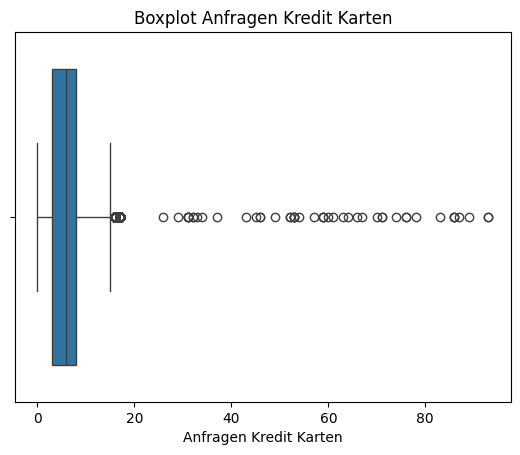

In [77]:
sns.boxplot(data=train_df, x="Num_Credit_Inquiries")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot Anfragen Kredit Karten")
plt.xlabel("Anfragen Kredit Karten")
plt.show()

In [78]:
train_df['Num_Credit_Inquiries'].describe()

count    100000.0
mean      5.75924
std      4.012363
min           0.0
25%           3.0
50%           6.0
75%           8.0
max          93.0
Name: Num_Credit_Inquiries, dtype: Float64

## Credit_Mix - Represents the classification of the mix of credits

- leere Werte werden mit "Unknown" ersetzt

In [79]:
train_df["Credit_Mix"].isna().sum()

0

In [80]:
train_df['Credit_Mix'] = (
    train_df['Credit_Mix']
    .replace('_', 'Unknown')
    .astype(str)
    .str.title()
)

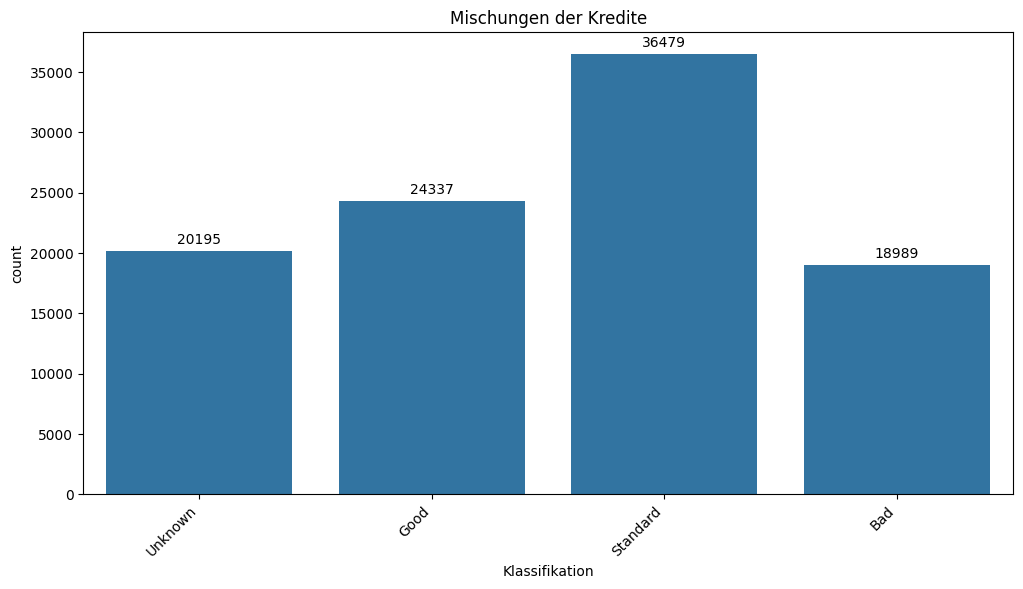

In [81]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(train_df, x="Credit_Mix")

for container in ax.containers:
    ax.bar_label(container, fmt='%d',
                label_type='edge',
                padding=3)

plt.xticks(rotation=45, ha="right")
plt.title("Mischungen der Kredite")
plt.xlabel("Klassifikation")
plt.show()

In [82]:
train_df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: count, dtype: int64

## Outstanding_Debt - Represents the remaining debt to be paid (in USD)

- nicht zahlenartige Werte werden entfernt
- leere Werte etc. werden mit NaN ersetzt
- Werte werden numerisch
- NaN werden mit dem Median ersetzt
- negative Werte werden positiv

In [83]:
train_df["Outstanding_Debt"].isna().sum()

0

In [84]:
train_df['Outstanding_Debt'] = (
    train_df['Outstanding_Debt']
    .astype(str)
    .str.replace(r'[^0-9\-\.]', '', regex=True)
    .replace({'': np.nan, '-': np.nan, '.': np.nan})
    .pipe(pd.to_numeric, errors='coerce')
    .pipe(lambda s: s.fillna(s.median()))
    .abs()
)

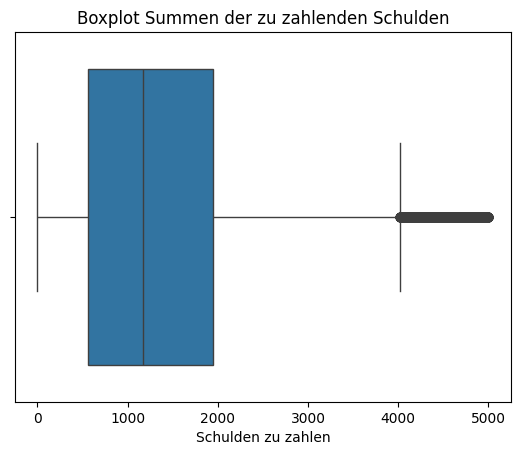

In [85]:
sns.boxplot(data=train_df, x="Outstanding_Debt")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot Summen der zu zahlenden Schulden")
plt.xlabel("Schulden zu zahlen")
plt.show()

In [86]:
train_df['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

## Credit_Utilization_Ratio - Represents the utilization ratio of credit card

- Wert wird numerisch

In [87]:
train_df["Credit_Utilization_Ratio"].isna().sum()

0

In [88]:
train_df['Credit_Utilization_Ratio'].head()

0    26.822620
1    31.944960
2    28.609352
3    31.377862
4    24.797347
Name: Credit_Utilization_Ratio, dtype: float64

In [89]:
train_df['Credit_Utilization_Ratio'].value_counts(ascending=False)

Credit_Utilization_Ratio
26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: count, Length: 100000, dtype: int64

In [90]:
train_df['Credit_Utilization_Ratio'] = (
    pd.to_numeric(train_df['Credit_Utilization_Ratio'], errors='coerce')
)

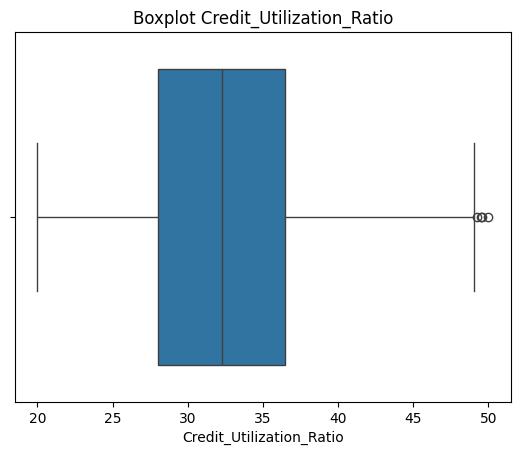

In [91]:
sns.boxplot(data=train_df, x="Credit_Utilization_Ratio")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot Credit_Utilization_Ratio")
plt.xlabel("Credit_Utilization_Ratio")
plt.show()

In [92]:
train_df['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

## Credit_History_Age - Represents the age of credit history of the person

- Gesamtmonat wird berechnet = Jahre*12+Monat
- NaN mit 0 ersetzen
- Monate werden in Jahre umgewandelt
- rundet auf eine Nachkommastelle

In [93]:
train_df['Credit_History_Age'].isna().sum()

9030

In [94]:
train_df['Credit_History_Age'].head(10)

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
5    22 Years and 6 Months
6    22 Years and 7 Months
7                      NaN
8    26 Years and 7 Months
9    26 Years and 8 Months
Name: Credit_History_Age, dtype: object

In [95]:
train_df['Credit_History_Age'] = (
    train_df['Credit_History_Age'].astype(str)
    .pipe(lambda s: (
        s.str.extract(r'(\d+)\s*Years', expand=False).astype(float) * 12 +
        s.str.extract(r'(\d+)\s*Months', expand=False).astype(float)
    ))
    .fillna(0)
    .pipe(lambda s: s / 12)
    .astype('float')
    .round(1)
)

In [96]:
train_df['Credit_History_Age'].head(10)

0    22.1
1     0.0
2    22.2
3    22.3
4    22.4
5    22.5
6    22.6
7     0.0
8    26.6
9    26.7
Name: Credit_History_Age, dtype: float64

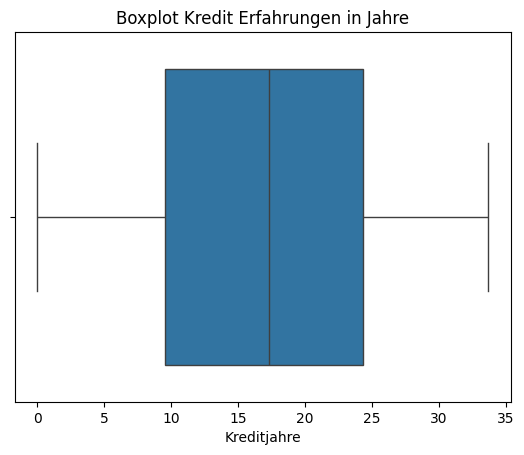

In [97]:
sns.boxplot(data=train_df, x="Credit_History_Age")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot Kredit Erfahrungen in Jahre")
plt.xlabel("Kreditjahre")
plt.show()

In [98]:
train_df['Credit_History_Age'].describe()

count    100000.000000
mean         16.767975
std           9.526551
min           0.000000
25%           9.500000
50%          17.300000
75%          24.300000
max          33.700000
Name: Credit_History_Age, dtype: float64

## Payment_of_Min_Amount - Represents whether only the minimum amount was paid by the person

- NM wird mit Unknown ersetzt

In [99]:
train_df['Payment_of_Min_Amount'].isna().sum()

0

In [100]:
train_df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [101]:
train_df['Payment_of_Min_Amount'] = (
    train_df['Payment_of_Min_Amount']
    .replace('NM', 'Unknown')
    .astype(str)                # sicherstellen, dass alles String ist
    .str.title()                # "unknown" → "Unknown", "yes" → "Yes"
)

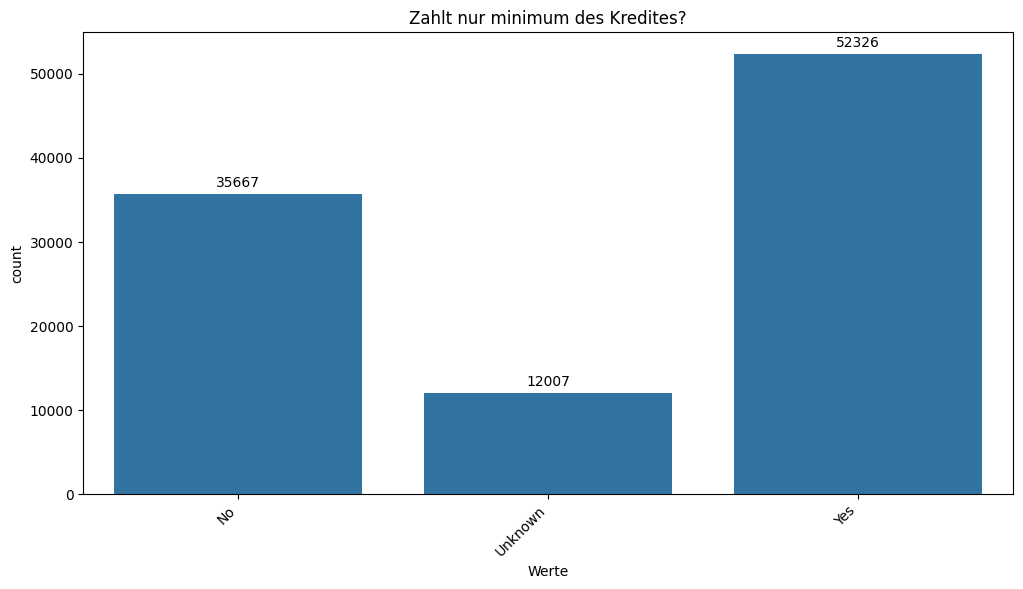

In [102]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(train_df, x="Payment_of_Min_Amount")

for container in ax.containers:
    ax.bar_label(container, fmt='%d',
                label_type='edge',
                padding=3)

plt.xticks(rotation=45, ha="right")
plt.title("Zahlt nur minimum des Kredites?")
plt.xlabel("Werte")
plt.show()

## Total_EMI_per_month - Represents the monthly EMI payments (in USD)

= An equated monthly installment (EMI) is a fixed payment amount made by a borrower to a lender at a specified date each calendar month.

- Wert wird numerisch
- 4 und 5 stellige auf 3 stellig ändern

In [103]:
train_df["Total_EMI_per_month"].isna().sum()

0

In [104]:
train_df["Total_EMI_per_month"].head(10)

0    49.574949
1    49.574949
2    49.574949
3    49.574949
4    49.574949
5    49.574949
6    49.574949
7    49.574949
8    18.816215
9    18.816215
Name: Total_EMI_per_month, dtype: float64

In [105]:
train_df['Total_EMI_per_month'] = (
    train_df['Total_EMI_per_month']
    .pipe(pd.to_numeric, errors='coerce')
    .round(1)
    .abs()
)

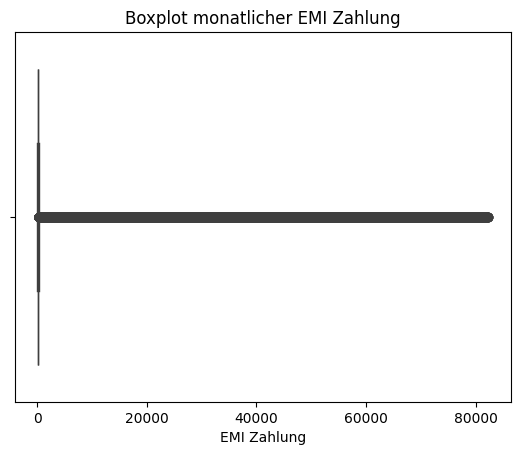

In [106]:
sns.boxplot(data=train_df, x="Total_EMI_per_month")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot monatlicher EMI Zahlung")
plt.xlabel("EMI Zahlung")
plt.show()

In [107]:
train_df['Total_EMI_per_month'] = train_df['Total_EMI_per_month'].apply(
    lambda x: (
        x / 100 if (pd.notna(x) and len(str(int(x))) == 5)
        else x / 10 if (pd.notna(x) and len(str(int(x))) == 4)
        else x
    )
)

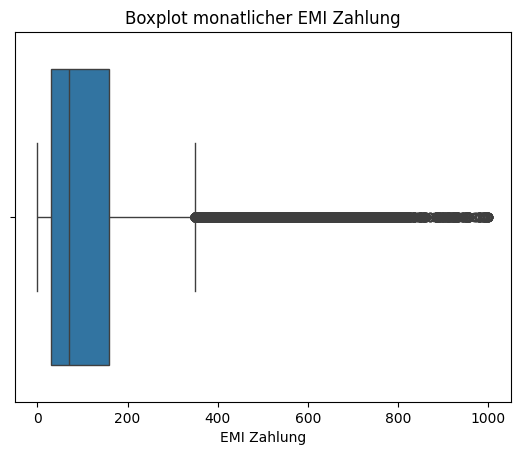

In [108]:
sns.boxplot(data=train_df, x="Total_EMI_per_month")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot monatlicher EMI Zahlung")
plt.xlabel("EMI Zahlung")
plt.show()

In [109]:
train_df['Total_EMI_per_month'].describe()

count    100000.000000
mean        115.374221
std         133.623200
min           0.000000
25%          30.300000
50%          69.250000
75%         157.700000
max         999.700000
Name: Total_EMI_per_month, dtype: float64

## Amount_invested_monthly - Represents the monthly amount invested by the customer (in USD)

- nicht zahlenartige Werte entfernen
- leere Werte etc. mit NaN ersetzten
- Wert numerisch umwandeln
- negative Werte postitiv machen
- NaN mit 0 setzen

In [110]:
train_df['Amount_invested_monthly'].isna().sum()

4479

In [111]:
train_df['Amount_invested_monthly'] = (
    train_df['Amount_invested_monthly']
    .astype(str)
    .str.replace(r'[^0-9\-\.]', '', regex=True)       # Nur Ziffern, Minus und Punkt behalten
    .replace({'': np.nan, '-': np.nan, '.': np.nan})  # Leere oder Platzhalter → NaN
    .pipe(pd.to_numeric, errors='coerce')             # In numerisch konvertieren
    .abs()                                   # Negative Werte auf 0 setzen
    .fillna(0)             # Fehlende Werte mit Median auffüllen
)

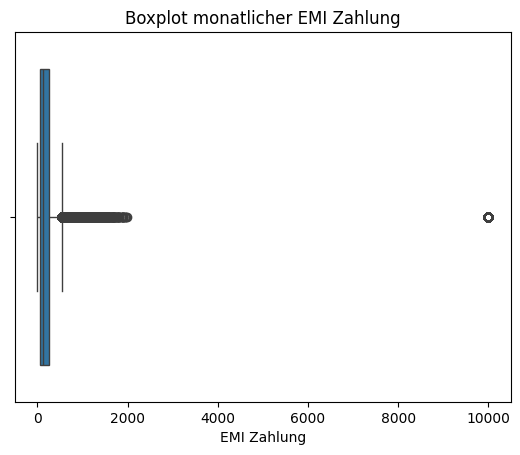

In [112]:
sns.boxplot(data=train_df, x="Amount_invested_monthly")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot monatlicher EMI Zahlung")
plt.xlabel("EMI Zahlung")
plt.show()

In [113]:
train_df['Amount_invested_monthly'].describe()

count    100000.000000
mean        608.863270
std        2001.382002
min           0.000000
25%          67.431711
50%         128.698239
75%         255.038698
max       10000.000000
Name: Amount_invested_monthly, dtype: float64

## Payment_Behaviour - Represents the payment behavior of the customer (in USD)

- Ausprägungen besser lesbar machen

In [114]:
train_df['Payment_Behaviour'].isna().sum()

0

In [115]:
train_df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [116]:
train_df['Payment_Behaviour'] = (
    train_df['Payment_Behaviour']
    .replace('!@9#%8', 'Unknown')
    .astype(str)
    .str.replace('_', ' ', regex=False)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .str.title()
)

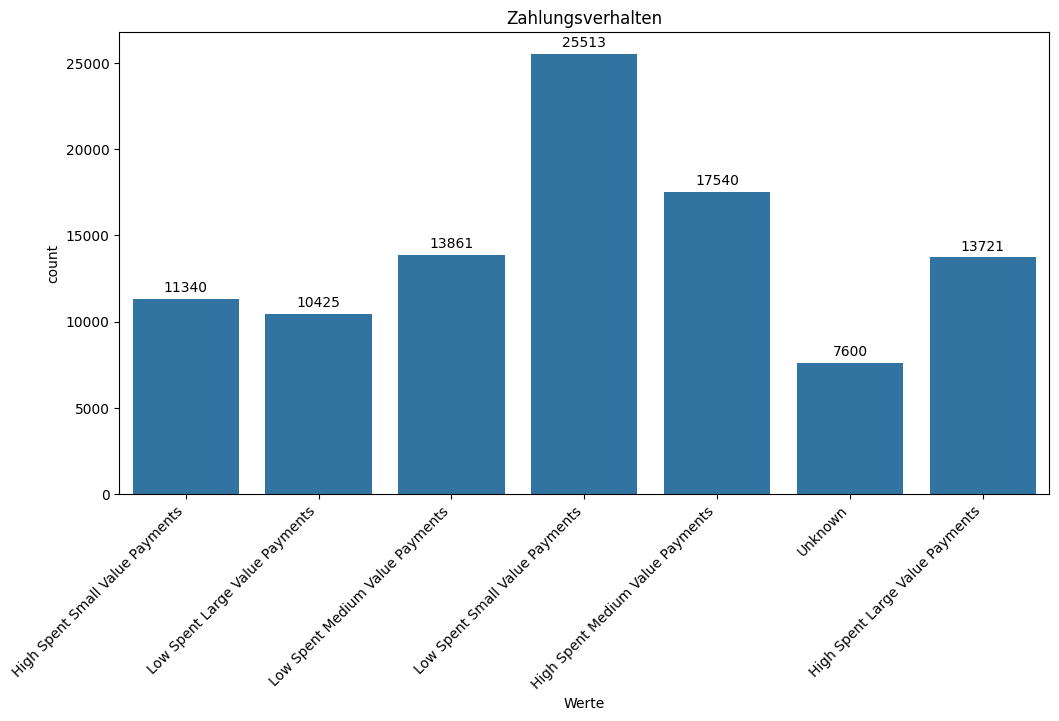

In [117]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(train_df, x="Payment_Behaviour")

for container in ax.containers:
    ax.bar_label(container, fmt='%d',
                label_type='edge',
                padding=3)

plt.xticks(rotation=45, ha="right")
plt.title("Zahlungsverhalten")
plt.xlabel("Werte")
plt.show()

## Monthly_Balance - Represents the monthly balance amount of the customer (in USD)

- nicht zahlenartige Werte entfent
- leere Werte etc. mit NaN ersetzt
- numerisch umwandeln
- unrealtischte Werte und leere mit 0 ersetzten

In [118]:
train_df['Monthly_Balance'].isna().sum()

1200

In [119]:
train_df['Monthly_Balance'] = (
    train_df['Monthly_Balance']
    .astype(str)
    .str.replace(r'[^0-9\-\.]', '', regex=True)
    .replace({'': np.nan, '-': np.nan, '.': np.nan})
    .pipe(pd.to_numeric, errors='coerce')
    .where(lambda s: s > -1e6, other=np.nan)
    .fillna(0)
)

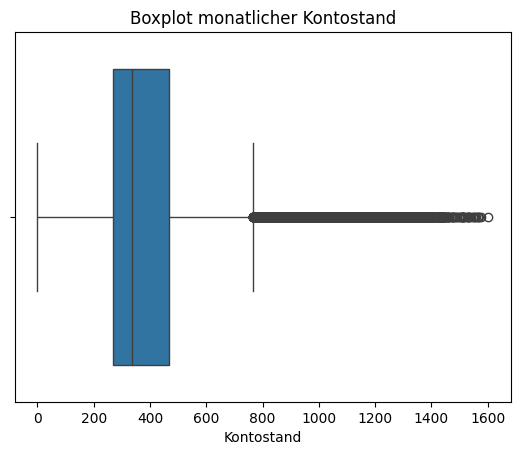

In [120]:
sns.boxplot(data=train_df, x="Monthly_Balance")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot monatlicher Kontostand")
plt.xlabel("Kontostand")
plt.show()

In [121]:
train_df['Monthly_Balance'].describe()

count    100000.000000
mean        397.684413
std         217.132017
min           0.000000
25%         267.871374
50%         334.806633
75%         467.670597
max        1602.040519
Name: Monthly_Balance, dtype: float64

## Credit_Score - Represents the bracket of credit score (Poor, Standard, Good)

In [122]:
train_df['Credit_Score'] = train_df['Credit_Score'].str.title()

In [123]:
train_df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

### Qualitätscheck nach der Bereinigung


In [124]:
train_df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                          5572
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [125]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           Int64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             Int64
Num_Credit_Card               Int64
Interest_Rate                 Int64
Num_of_Loan                   Int64
Type_of_Loan                 object
Delay_from_due_date           Int64
Num_of_Delayed_Payment        Int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          Int64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

# 2️⃣ Datenbereinigung - test

## Hilfsfunktion aus train

Die vorgenommenen Bereinigungsschritte aus train werden für test angewendet (KI generiert)

In [126]:
def clean_dataframe(df):
    df = df.copy()

    def _limit_three_digits(series):
        series = series.copy()
        mask = series >= 100
        if mask.any():
            series.loc[mask] = (
                series.loc[mask]
                .astype(str)
                .str[:1]
                .astype(float)
            )
        return series

    df['ID'] = df['ID'].astype(str).str.strip()
    df['Customer_ID'] = df['Customer_ID'].astype(str).str.strip()

    df['Name'] = (
        df['Name']
        .fillna('Unknown')
        .astype(str)
        .str.strip()
        .str.replace(r"\s+", " ", regex=True)
        .str.title()
    )

    pattern = re.compile(r'^\d{3}-\d{2}-\d{4}$')
    df['SSN'] = (
        df['SSN']
        .astype(str)
        .str.strip()
    )
    df.loc[~df['SSN'].apply(lambda x: bool(pattern.match(x)) if isinstance(x, str) else False), 'SSN'] = pd.NA

    df['Month'] = (
        df['Month']
        .astype(str)
        .str.strip()
        .str.title()
    )

    df['Age'] = (
        df['Age']
        .astype(str)
        .str.replace('_', '', regex=False)
    )
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce').abs()
    age_mask = df['Age'] >= 100
    if age_mask.any():
        df.loc[age_mask, 'Age'] = (
            df.loc[age_mask, 'Age'].astype(str).str[:1].astype(float)
        )
    df['Age'] = (
        df['Age']
        .clip(lower=16)
        .fillna(df['Age'].median())
        .round()
        .astype('Int64')
    )

    df['Occupation'] = (
        df['Occupation']
        .astype(str)
        .replace('_______', 'Unknown')
        .str.replace('_', ' ', regex=False)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
        .str.title()
    )

    df['Annual_Income'] = (
        pd.to_numeric(
            df['Annual_Income']
            .astype(str)
            .str.replace(r'[^0-9\-\.]', '', regex=True)
            .replace({'': np.nan, '-': np.nan, '.': np.nan}),
            errors='coerce'
        )
        .abs()
    )
    df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())

    df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Annual_Income'] / 12)

    df['Num_Bank_Accounts'] = (
        df['Num_Bank_Accounts']
        .astype(str)
        .str.replace(r'[^0-9\-\.,]', '', regex=True)
        .str.replace(',', '.', regex=False)
        .pipe(pd.to_numeric, errors='coerce')
        .abs()
        .round()
    )
    df['Num_Bank_Accounts'] = _limit_three_digits(df['Num_Bank_Accounts'])
    df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].round().astype('Int64')

    df['Num_Credit_Card'] = (
        df['Num_Credit_Card']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan})
        .pipe(pd.to_numeric, errors='coerce')
        .abs()
        .round()
    )
    df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(df['Num_Credit_Card'].median())
    df['Num_Credit_Card'] = _limit_three_digits(df['Num_Credit_Card'])
    df['Num_Credit_Card'] = df['Num_Credit_Card'].round().astype('Int64')

    df['Interest_Rate'] = (
        df['Interest_Rate']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan})
        .pipe(pd.to_numeric, errors='coerce')
        .abs()
        .round()
    )
    df['Interest_Rate'] = df['Interest_Rate'].fillna(df['Interest_Rate'].median())
    df['Interest_Rate'] = _limit_three_digits(df['Interest_Rate'])
    df['Interest_Rate'] = df['Interest_Rate'].round().astype('Int64')

    df['Num_of_Loan'] = (
        df['Num_of_Loan']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan})
        .pipe(pd.to_numeric, errors='coerce')
        .abs()
        .round()
    )
    df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median())
    df['Num_of_Loan'] = _limit_three_digits(df['Num_of_Loan'])
    df['Num_of_Loan'] = df['Num_of_Loan'].round().astype('Int64')

    delay_from_due_date = pd.to_numeric(df['Delay_from_due_date'], errors='coerce')
    delay_from_due_date = delay_from_due_date.fillna(delay_from_due_date.median())
    df['Delay_from_due_date'] = delay_from_due_date.abs().round().astype('Int64')

    df['Num_of_Delayed_Payment'] = (
        df['Num_of_Delayed_Payment']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan})
        .pipe(pd.to_numeric, errors='coerce')
    )
    df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())
    df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].abs().round()
    df['Num_of_Delayed_Payment'] = _limit_three_digits(df['Num_of_Delayed_Payment'])
    df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].round().astype('Int64')

    df['Changed_Credit_Limit'] = (
        df['Changed_Credit_Limit']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan})
        .pipe(pd.to_numeric, errors='coerce')
        .fillna(0)
    )

    df['Num_Credit_Inquiries'] = (
        df['Num_Credit_Inquiries']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan})
        .pipe(pd.to_numeric, errors='coerce')
    )
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].abs().round()
    df['Num_Credit_Inquiries'] = _limit_three_digits(df['Num_Credit_Inquiries'])
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].round().astype('Int64')

    df['Credit_Mix'] = (
        df['Credit_Mix']
        .replace('_', 'Unknown')
        .astype(str)
        .str.title()
    )

    df['Outstanding_Debt'] = (
        df['Outstanding_Debt']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan})
        .pipe(pd.to_numeric, errors='coerce')
    )
    df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median())
    df['Outstanding_Debt'] = df['Outstanding_Debt'].abs()

    df['Credit_Utilization_Ratio'] = pd.to_numeric(df['Credit_Utilization_Ratio'], errors='coerce')

    credit_history = df['Credit_History_Age'].astype(str)
    years = pd.to_numeric(credit_history.str.extract(r'(\d+)\s*Years', expand=False), errors='coerce')
    months = pd.to_numeric(credit_history.str.extract(r'(\d+)\s*Months', expand=False), errors='coerce')
    df['Credit_History_Age'] = (
        ((years.fillna(0) * 12) + months.fillna(0)) / 12
    ).fillna(0).astype(float).round(1)

    df['Payment_of_Min_Amount'] = (
        df['Payment_of_Min_Amount']
        .replace('NM', 'Unknown')
        .astype(str)
        .str.title()
    )

    df['Total_EMI_per_month'] = (
        df['Total_EMI_per_month']
        .pipe(pd.to_numeric, errors='coerce')
        .round(1)
        .abs()
    )
    df['Total_EMI_per_month'] = df['Total_EMI_per_month'].apply(
        lambda x: (
            x / 100 if (pd.notna(x) and len(str(int(x))) == 5)
            else x / 10 if (pd.notna(x) and len(str(int(x))) == 4)
            else x
        )
    )

    df['Amount_invested_monthly'] = (
        df['Amount_invested_monthly']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan})
        .pipe(pd.to_numeric, errors='coerce')
        .abs()
        .fillna(0)
    )

    df['Payment_Behaviour'] = (
        df['Payment_Behaviour']
        .replace('!@9#%8', 'Unknown')
        .astype(str)
        .str.replace('_', ' ', regex=False)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
        .str.title()
    )

    df['Monthly_Balance'] = (
        df['Monthly_Balance']
        .astype(str)
        .str.replace(r'[^0-9\-\.]', '', regex=True)
        .replace({'': np.nan, '-': np.nan, '.': np.nan})
        .pipe(pd.to_numeric, errors='coerce')
    )
    df['Monthly_Balance'] = df['Monthly_Balance'].where(df['Monthly_Balance'] > -1e6, np.nan).fillna(0)

    if 'Credit_Score' in df.columns:
        df['Credit_Score'] = df['Credit_Score'].astype(str).str.title()

    return df


## Überprüfung

In [127]:
test_df = clean_dataframe(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  Int64  
 5   SSN                       47172 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  Int64  
 10  Num_Credit_Card           50000 non-null  Int64  
 11  Interest_Rate             50000 non-null  Int64  
 12  Num_of_Loan               50000 non-null  Int64  
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

# 3️⃣ Export

In [128]:
train_df.to_csv("../data/train_cleaned.csv", index=False)
test_df.to_csv("../data/test_cleaned.csv", index = False)